# PE EVALUABLE: NBA

Vamos a aplicar los contenidos aprendidos tratando un caso real, los datos de la NBA de 2022-2023. En este sentido yo voy a proponer diferentes preguntas, pero tenéis total libertad para hacer el análisis que considereis oportuno siempre y cuando se trabajane las diferentes correlaciones.

En todos los casos, partiremos de nuestros datos para despúes a través de neustros conocimientos de distribuciones realitzar los cálculos de manera inferencial.

## A1: Anàlisis del DataSet

Vamos a utilizar el dataSet https://www.nbastuffer.com/2023-2024-nba-player-stats/:

* Solo queremos jugadores titulares (más de 25min pp) y que hayan dispustado màs de 10 partidos ¿De cuántos jugadores tenemos datos?
* Para nuestro anàlisis no nos interesan todas las columnas. Nos quedaremos únicamente con Nombre, Equipo, Edad, Posición Partidos Jugados, Minutos por partido, Media de puntos, Media rebotes, Media de Pèrdidas, %TL anotados


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

# Cargar el dataset
file_path = "NBA_Stats202425.csv"
df_nba_o = pd.read_csv(file_path)

# Filtrar jugadores titulares (más de 25 minutos por partido y más de 10 partidos jugados)
filtered_df = df_nba_o[(df_nba_o["MPG"] > 25) & (df_nba_o["GP"] > 10)]

# Contar el número de jugadores que cumplen con las condiciones
num_players = filtered_df.shape[0]

# Seleccionar solo las columnas relevantes
columns_of_interest = [
    "NAME", "TEAM", "AGE", "POS", 
    "GP", "MPG", "PPG", "RPG", 
    "TPG", "FT%"
]

filtered_df = filtered_df[columns_of_interest]

# Mostrar resultados
print(f"Número de jugadores que cumplen con los criterios: {num_players}")
print(filtered_df.head())


Número de jugadores que cumplen con los criterios: 162
                      NAME TEAM   AGE  POS  GP   MPG   PPG   RPG  TPG    FT%
0    Giannis Antetokounmpo  Mil  30.1    F  32  35.0  31.5  11.9  3.5  0.588
1  Shai Gilgeous-Alexander  Okc  26.5    G  39  34.4  31.4   5.5  2.7  0.895
2             Nikola Jokic  Den  29.9    C  34  36.9  30.6  13.2  3.1  0.800
3              LaMelo Ball  Cha  23.4    G  25  34.0  29.7   5.4  3.9  0.833
5              Luka Doncic  Dal  25.9  F-G  22  35.7  28.1   8.3  3.4  0.767


## A2: Anàlisis de la Edad

No nos vamos a centrar únicamente en nuestro caso de jugadores, sino que obtendremos estadísiticos básicos para poder realizar cálculo inferencial

Tenemos la sensación de que los jugadores cada vez juegan más años, así que que queremos responder a las siguientes preguntas:

* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad inferior a 23 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad superior a 34 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad entre 28 a 32 años?
* ¿Cuál es la edad a partir de la qual el 90% de los jugadores son menores?


In [2]:
# Calcular la media y desviación estándar de la edad
mean_age = filtered_df["AGE"].mean()
std_age = filtered_df["AGE"].std()

# 1. Probabilidad de que un jugador tenga una edad inferior a 23 años
prob_less_than_23 = stats.norm.cdf(23, loc=mean_age, scale=std_age)

# 2. Probabilidad de que un jugador tenga una edad superior a 34 años
prob_greater_than_34 = 1 - stats.norm.cdf(34, loc=mean_age, scale=std_age)

# 3. Probabilidad de que un jugador tenga una edad entre 28 y 32 años
prob_between_28_32 = stats.norm.cdf(32, loc=mean_age, scale=std_age) - stats.norm.cdf(28, loc=mean_age, scale=std_age)

# 4. Edad a partir de la cual el 90% de los jugadores son menores
age_90th_percentile = stats.norm.ppf(0.9, loc=mean_age, scale=std_age)

# Mostrar resultados
print(f"Media de la edad: {mean_age:.2f}, Desviación estándar: {std_age:.2f}")
print(f"1. Probabilidad de que un jugador tenga menos de 23 años: {prob_less_than_23:.2%}")
print(f"2. Probabilidad de que un jugador tenga más de 34 años: {prob_greater_than_34:.2%}")
print(f"3. Probabilidad de que un jugador tenga entre 28 y 32 años: {prob_between_28_32:.2%}")
print(f"4. Edad a partir de la cual el 90% de los jugadores son menores: {age_90th_percentile:.2f} años")

Media de la edad: 27.46, Desviación estándar: 4.38
1. Probabilidad de que un jugador tenga menos de 23 años: 15.41%
2. Probabilidad de que un jugador tenga más de 34 años: 6.77%
3. Probabilidad de que un jugador tenga entre 28 y 32 años: 30.11%
4. Edad a partir de la cual el 90% de los jugadores son menores: 33.07 años


Con nuestros datos obervacionales: 

* Muestra un gràfico BoxPlot diferenciando entre Centers i Guards, y haz una reflexión sobre sus medias y su dispersión.

* El Sentido común me dice que cuanta más edad mayor restricción de minutos, eso se cumple, existe una correlación entre esas dos variables?

D:\Temp\ipykernel_2468\4827160.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="POS", y="MPG", data=df_filtered, palette="pastel")


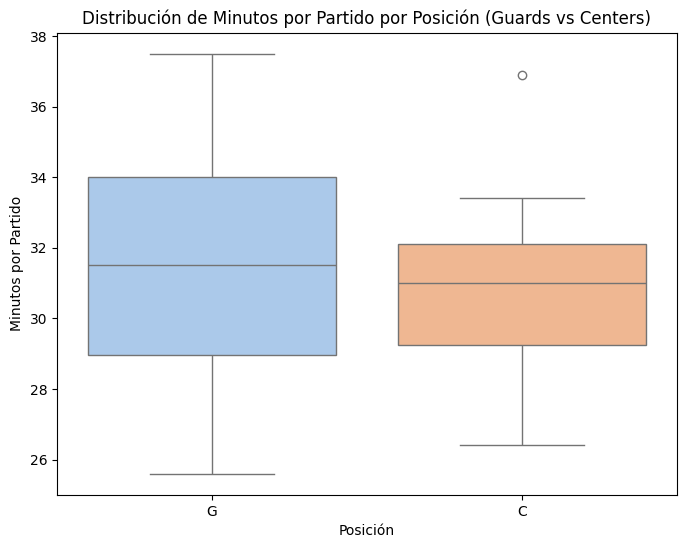

Coeficiente de correlación entre Edad y Minutos Jugados: 0.10
La correlación no es estadísticamente significativa (p = 0.3789).


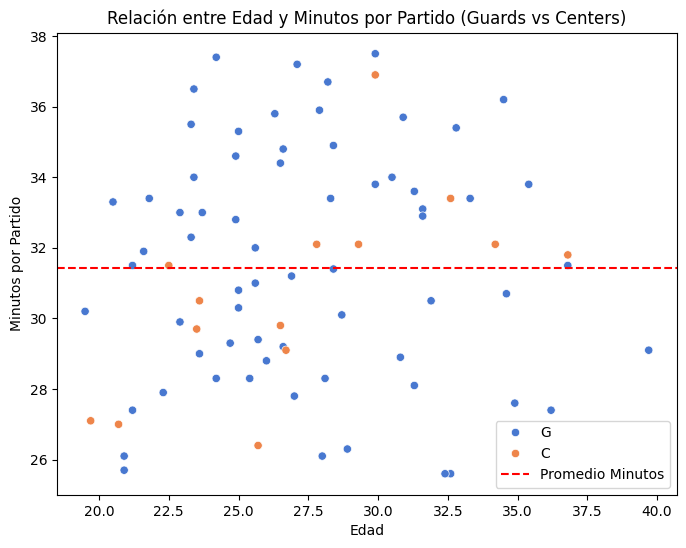

In [3]:
# Filtramos solo jugadores de las posiciones 'G' (Guards) y 'C' (Centers)
df_filtered = filtered_df[filtered_df["POS"].isin(["G", "C"])]

# BOX PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(x="POS", y="MPG", data=df_filtered, palette="pastel")
plt.title("Distribución de Minutos por Partido por Posición (Guards vs Centers)")
plt.xlabel("Posición")
plt.ylabel("Minutos por Partido")
plt.show()

# CÁLCULO DE LA CORRELACIÓN ENTRE EDAD Y MINUTOS POR PARTIDO
correlation, p_value = pearsonr(df_filtered["AGE"], df_filtered["MPG"])

print(f"Coeficiente de correlación entre Edad y Minutos Jugados: {correlation:.2f}")
if p_value < 0.05:
    print(f"La correlación es estadísticamente significativa (p = {p_value:.4f}).")
else:
    print(f"La correlación no es estadísticamente significativa (p = {p_value:.4f}).")

# GRÁFICO DE DISPERSIÓN
plt.figure(figsize=(8, 6))
sns.scatterplot(x="AGE", y="MPG", data=df_filtered, hue="POS", palette="muted")
plt.title("Relación entre Edad y Minutos por Partido (Guards vs Centers)")
plt.xlabel("Edad")
plt.ylabel("Minutos por Partido")
plt.axhline(y=df_filtered["MPG"].mean(), color="r", linestyle="--", label="Promedio Minutos")
plt.legend()
plt.show()

## A2: Triples de Lebron

Parece que este año lebron  está bastante acertado en el triple. Suponiendo que tirara 5 triples por partido, responde a las siguientes preguntas:

* ¿Cuál es la probabilidad de que no meta ninguno?
* ¿Cuál es la probabilidad de que los meta todos?

In [4]:
from nba_api.stats.endpoints import leagueleaders
from scipy.stats import binom

# Paso 1: Obtener el porcentaje promedio de triples de los jugadores
leaders = leagueleaders.LeagueLeaders()
leaders_df = leaders.get_data_frames()[0]

# Calcular el promedio de FG3_PCT (porcentaje de triples)
average_3p_percentage = leaders_df["FG3_PCT"].mean()
p = average_3p_percentage  # Probabilidad de éxito en un intento

# Mostrar el porcentaje promedio de triples
print(f"Porcentaje promedio de triples de la liga: {p:.2%}")

# Paso 2: Calcular las probabilidades con distribución binomial
n = 5  # Número de intentos

# a) Probabilidad de que no meta ninguno (k = 0)
prob_no_mete_ninguno = binom.pmf(0, n, p)

# b) Probabilidad de que meta todos (k = 5)
prob_meta_todos = binom.pmf(5, n, p)

# Mostrar resultados
print(f"1. Probabilidad de que no meta ninguno de los 5 triples: {prob_no_mete_ninguno:.2%}")
print(f"2. Probabilidad de que meta todos los 5 triples: {prob_meta_todos:.2%}")


Porcentaje promedio de triples de la liga: 29.64%
1. Probabilidad de que no meta ninguno de los 5 triples: 17.25%
2. Probabilidad de que meta todos los 5 triples: 0.23%


Muestra su función de distribución acumulada empírica y responde las siguientes preguntas:

* ¿Cuál es la probabilidad de que meta uno o menos? (Partido de poco acierto)
* ¿Cuál es la probabilidad de que meta tres o màs? (Partido de mucho acierto)

Porcentaje promedio de triples de la liga: 29.64%
1. Probabilidad de que meta uno o menos: 53.57%
2. Probabilidad de que meta tres o más: 15.83%


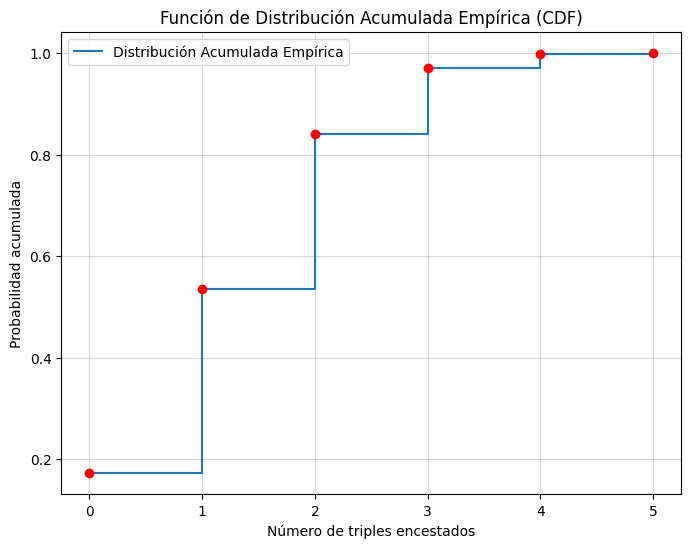

In [5]:
average_3p_percentage = leaders_df["FG3_PCT"].mean()
p = average_3p_percentage  # Probabilidad de éxito en un intento

# Mostrar el porcentaje promedio de triples
print(f"Porcentaje promedio de triples de la liga: {p:.2%}")

# Paso 2: Definir número de intentos
n = 5  # Número de intentos en un partido

# Paso 3: Calcular probabilidades acumuladas
# a) Probabilidad de que meta uno o menos (X <= 1)
prob_mete_uno_o_menos = binom.cdf(1, n, p)

# b) Probabilidad de que meta tres o más (X >= 3)
prob_mete_tres_o_mas = 1 - binom.cdf(2, n, p)

# Mostrar resultados
print(f"1. Probabilidad de que meta uno o menos: {prob_mete_uno_o_menos:.2%}")
print(f"2. Probabilidad de que meta tres o más: {prob_mete_tres_o_mas:.2%}")

# Paso 4: Graficar la función de distribución acumulada empírica
x = np.arange(0, n + 1)
cdf_values = binom.cdf(x, n, p)

plt.figure(figsize=(8, 6))
plt.step(x, cdf_values, where="post", label="Distribución Acumulada Empírica")
plt.scatter(x, cdf_values, color="red", zorder=5)
plt.title("Función de Distribución Acumulada Empírica (CDF)")
plt.xlabel("Número de triples encestados")
plt.ylabel("Probabilidad acumulada")
plt.xticks(range(0, n + 1))
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## A3 Picadas de Lebron tirando triples

Para hacer este apartado necesitamos el número de triples que se ha tirado lebron en cada partido. Tienes dos opciones:
* Upgrade: Llamar a la api https://www.balldontlie.io/ (Stats) y obtener los datos



Muestra en un histograma los triples lanzados por lebron, en cuàntos partidos ha lanzado 5 o más?

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


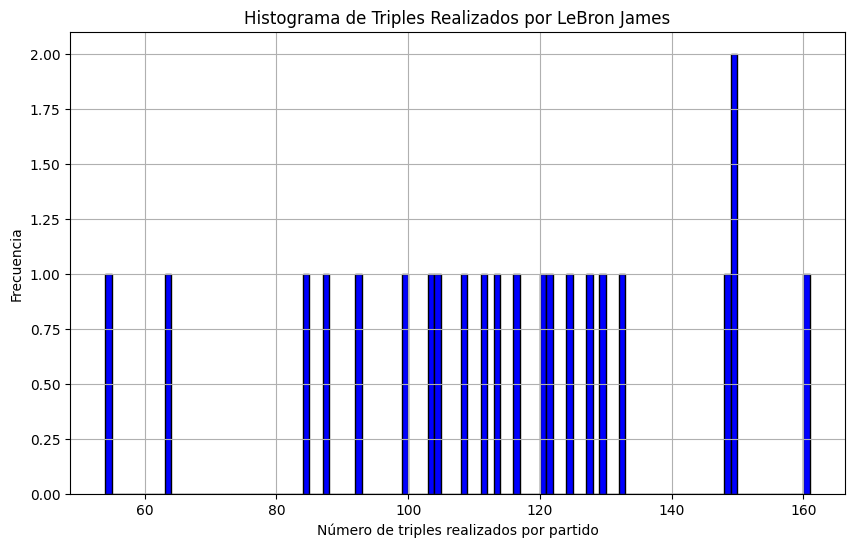

In [60]:
from nba_api.stats.endpoints import playercareerstats
import matplotlib.pyplot as plt
import numpy as np

# Obtener estadísticas de la carrera de LeBron James
player_id = 2544  # ID de LeBron James en la NBA
career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)

# Extraer los datos de triples realizados
stats_df = career_stats.get_data_frames()[0]
print(stats_df.columns)
triples = stats_df['FG3M']  # Triples hechos (3PM)

# Generar histograma
plt.figure(figsize=(10, 6))
plt.hist(triples, bins=range(int(min(triples)), int(max(triples)) + 1, 1), color='blue', edgecolor='black')
plt.title('Histograma de Triples Realizados por LeBron James')
plt.xlabel('Número de triples realizados por partido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


A partir de estos datos, vamos a hacer cálculo inferencial imaginando que juega infinitos partidos. Respondemos a la siguientes preguntas:

* ¿Cuál es la probabilidad de que lebron se tire 5 o más triples por partido?
* Como entrenador le he recomendado que tire 3 triples por partido, ¿cuál es la probabilidad de que eso suceda?

In [62]:
from scipy.stats import norm
import numpy as np

# Paso 1: Obtener el porcentaje promedio de triples de los jugadores
leaders = leagueleaders.LeagueLeaders()
leaders_df = leaders.get_data_frames()[0]

# Calcular el promedio de FG3_PCT (porcentaje de triples)
average_3p_percentage = leaders_df["FG3_PCT"].mean()
p = average_3p_percentage  # Probabilidad de éxito en un intento

# Paso 2: Aproximar la distribución binomial con una normal
n = 5  # Número de intentos en un partido
mu = n * p  # Media
sigma = np.sqrt(n * p * (1 - p))  # Desviación estándar

# Paso 3: Calcular probabilidades con la distribución normal

# a) Probabilidad de que tire 5 o más triples (P(X >= 5))
prob_tira_5_o_mas = 1 - norm.cdf(5, mu, sigma)

# b) Probabilidad de que tire exactamente 3 triples (P(X = 3)) - Aproximación
# Usamos la aproximación de la normal y calculamos la probabilidad en el rango [2.5, 3.5]
prob_tira_3 = norm.cdf(3.5, mu, sigma) - norm.cdf(2.5, mu, sigma)

# Mostrar resultados
print(f"Probabilidad de que tire 5 o más triples (usando normal): {prob_tira_5_o_mas:.2%}")
print(f"Probabilidad de que tire exactamente 3 triples (usando normal): {prob_tira_3:.2%}")


Probabilidad de que tire 5 o más triples (usando normal): 0.03%
Probabilidad de que tire exactamente 3 triples (usando normal): 13.53%


## A4 Tiempo entre lanzamiento

Lebron se tira un triple en promedio cada 12 minutos jugados en pista. Responde las siguientes preguntas:

* ¿Cuál és la probabilidad de que pase màs de 20 min sin tirarse un triple?
* ¿Cuál és la probabilidad de que se tire un triple entre el min 8 y 15min después del lanzamiento de triple anterior?

In [64]:
import numpy as np
from scipy.stats import expon

# Tasa de ocurrencia (lambda) en minutos
lambda_ = 1 / 12  # Un triple cada 12 minutos en promedio

# 1. Probabilidad de que pase más de 20 minutos sin tirarse un triple
prob_mas_20_min = expon.sf(20, scale=1/lambda_)

# 2. Probabilidad de que se tire un triple entre el minuto 8 y 15
prob_entre_8_y_15 = expon.cdf(15, scale=1/lambda_) - expon.cdf(8, scale=1/lambda_)

# Mostrar los resultados
print(f"Probabilidad de que pase más de 20 minutos sin tirarse un triple: {prob_mas_20_min:.2%}")
print(f"Probabilidad de que se tire un triple entre el minuto 8 y 15: {prob_entre_8_y_15:.2%}")


Probabilidad de que pase más de 20 minutos sin tirarse un triple: 18.89%
Probabilidad de que se tire un triple entre el minuto 8 y 15: 22.69%
